<a href="https://colab.research.google.com/github/linearAlgebra2024/linearAlgebra/blob/feat-minsup/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

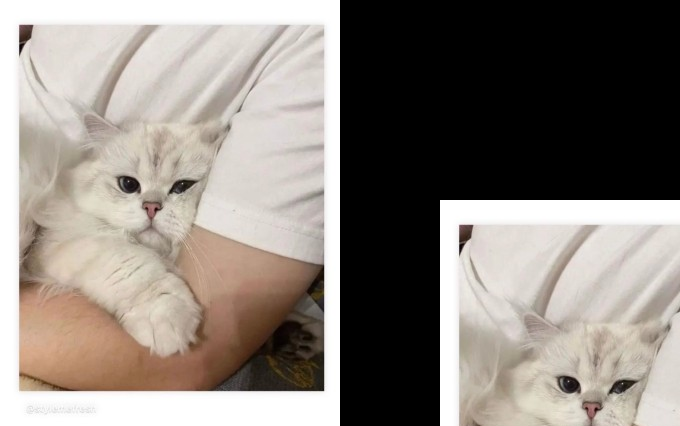

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/common.jpeg',cv2.IMREAD_COLOR)

height, width=img.shape[:2]

M=np.array([[1,0,100],[0,1,200],[0,0,1]],dtype=float)

dst=np.zeros(img.shape, dtype=np.uint8)

for y in range(height-1):
  for x in range(width-1):
    p=np.array([x,y,1])
    p_=np.dot(M,p)
    x_,y_=p_[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y_,x_]=img[y,x]

result=cv2.hconcat([img,dst])
# cv2.imshow("result",result)
cv2_imshow(result)
cv2.waitKey(0)

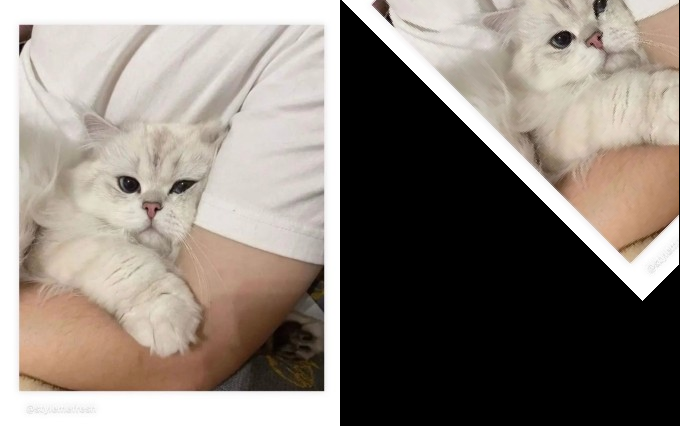

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/common.jpeg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]

angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)

rotation_matrix=np.array([[c,s,0],[-s,c,0],[0,0,1]],dtype=float)
dst=np.zeros(img.shape,dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    new_p=np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p=np.dot(inv_rotation_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_ < width and y_ > 0 and y_ < height:
      dst[y,x]=img[y_,x_]
result=cv2.hconcat([img,dst])
cv2_imshow(result)
# cv2.waitkey(0)

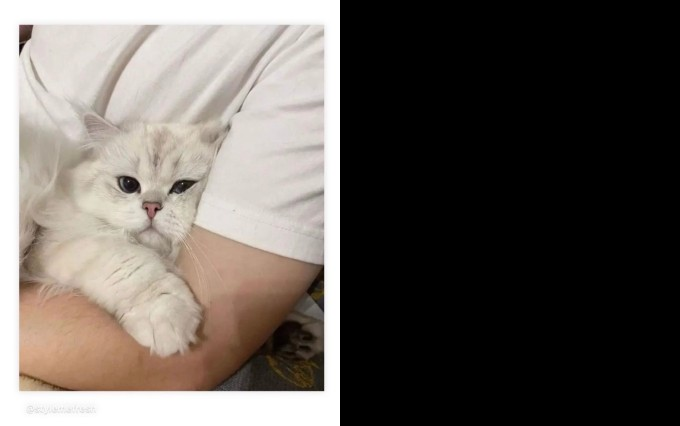

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/common.jpeg',cv2.IMREAD_COLOR)

height, width=img.shape[:2]
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])
dst=np.zeros(img.shape, dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    new_p=np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    oid_p=np.dot(inv_rotation_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst[y,x]=img[y_,x_]

result=cv2.hconcat([img,dst])
# cv2.imshow("result",result)
cv2_imshow(result)
cv2.waitKey(0)

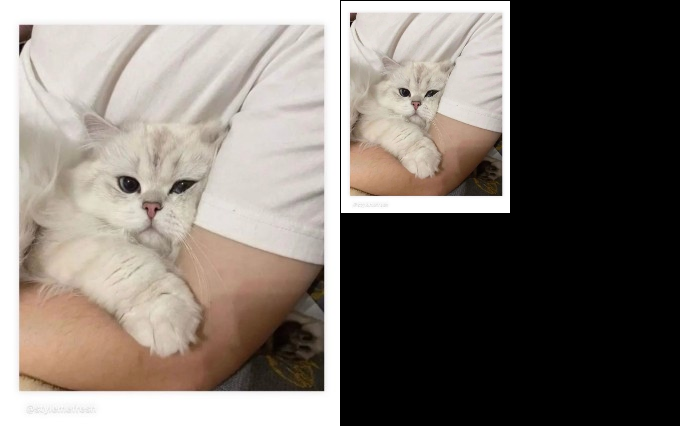

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/common.jpeg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0), img.item(y_,x_,0))
      dst.itemset((y,x,1), img.item(y_,x_,1))
      dst.itemset((y,x,2), img.item(y_,x_,2))
result=cv2.hconcat([img,dst])
# cv2.imshow("result",result)
cv2_imshow(result)
cv2.waitKey(0)

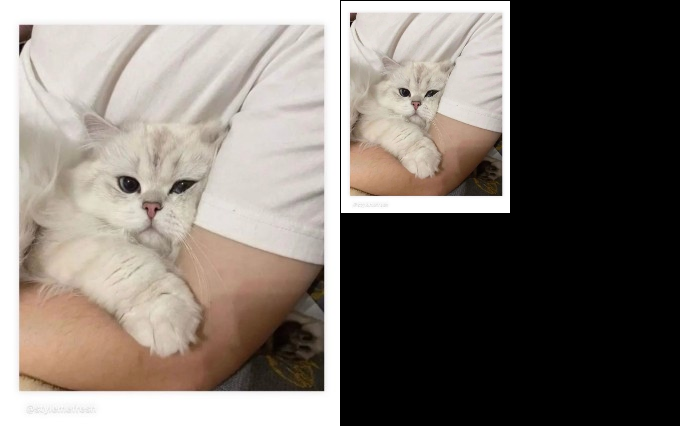

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/common.jpeg',cv2.IMREAD_COLOR)
height, width=img.shape[:2]
dst=cv2.resize(img,(int(width*1.5),int(height*1.5)))

# cv2.imshow("result", dst)
cv2_imshow(result)
# cv2.waitkey(0)

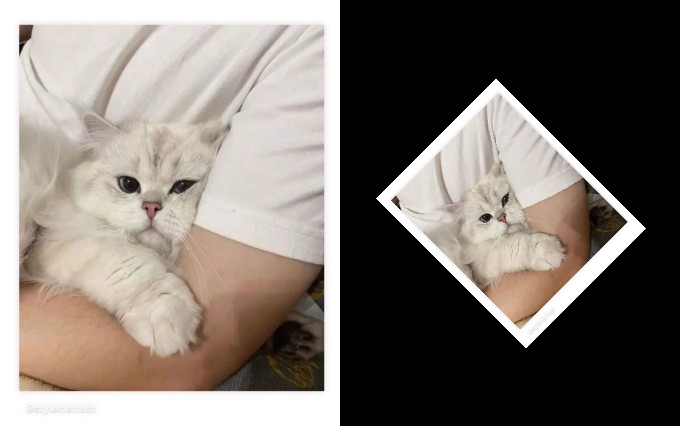

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/drive/MyDrive/common.jpeg',cv2.IMREAD_COLOR)

height, width=img.shape[:2]
scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_mtarix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2
rotation_matrix=np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])

T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_mtarix,T)
T=np.dot(rotation_matrix,T)
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p=np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(T)
    old_p=np.dot(inv_scaling_matrix,new_p)
    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_<height:
      dst.itemset((y,x,0), img.item(y_,x_,0))
      dst.itemset((y,x,1), img.item(y_,x_,1))
      dst.itemset((y,x,2), img.item(y_,x_,2))

result=cv2.hconcat([img,dst])
# cv2.imshow("result",result)
cv2_imshow(result)
cv2.waitKey(0)

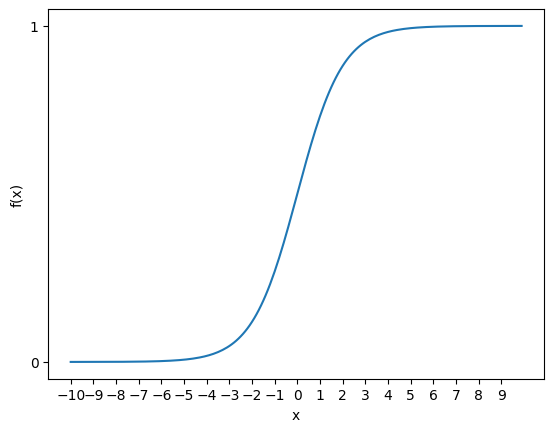

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
f=1/(1+np.exp(-x))
ax.plot(x,f)
ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

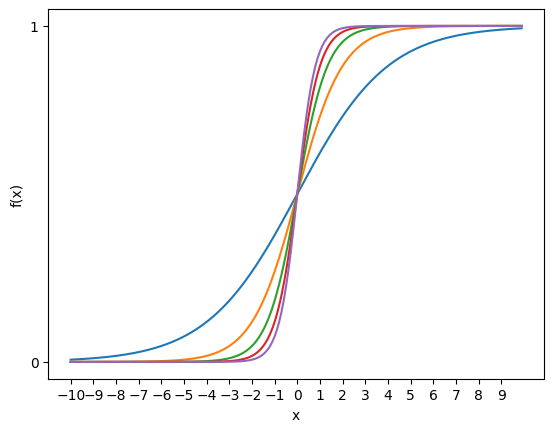

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
w=np.arange(0.5,3,0.5)
for w in w:
  f=1/(1+np.exp(-x*w))
  ax.plot(x,f)
ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

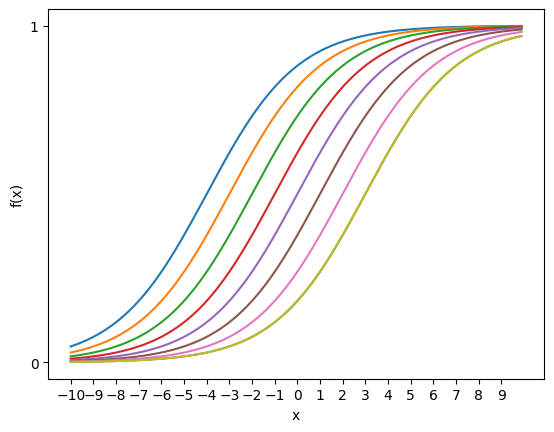

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
x=np.arange(-10,10,0.1)
w=0.5
B=np.arange(-2,2,0.5)
for b in B:
  f=1/(1+np.exp(-x*w+b))
  ax.plot(x,f)
ax.plot(x,f)
ax.set_xticks(range(-10,10))
ax.set_yticks(range(0,2))
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

In [ ]:
import numpy as np
def sigmoid(X):
  return 1/(1+np.exp(-x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)
  return a1,a2,a3,z2,z3

node_size={'input_layer_size':3,
           'hidden_layer_size':3,
           'output_layer_size':1
          }

W2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
W1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random((node_size['output_layer_size']))
b1=np.random.random((node_size['hidden_layer_size']))

x=np.array([[1,0,0],[0,0,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
y=np.array([1,0,0,0,1,1,0])
for x,y in zip(x,y):
  a1,a2,a3,z1,z2=feed_forward(x,W1,W2,b1,b2)
  print('a3={},y={},Error(L2 Norm)={}'.format(a3,y,np.linalg.norm((y-a3),2)))

a3=[0.73105858 0.5        0.5       ],y=1,Error(L2 Norm)=0.7565246117136661
a3=[0.5        0.5        0.73105858],y=0,Error(L2 Norm)=1.0170775021543457
a3=[0.73105858 0.5        0.73105858],y=0,Error(L2 Norm)=1.1484307949445827
a3=[0.73105858 0.73105858 0.5       ],y=0,Error(L2 Norm)=1.1484307949445827
a3=[0.5        0.73105858 0.5       ],y=1,Error(L2 Norm)=0.7565246117136661
a3=[0.73105858 0.73105858 0.73105858],y=1,Error(L2 Norm)=0.4658202060726217


0/1000,x=-10.000000,f(x)=205.000000,gradient=-0.300000,gradient sign=-
50/1000,x=-0.462545,f(x)=9.839400,gradient=-0.109251,gradient sign=-
100/1000,x=3.010707,f(x)=-16.042712,gradient=-0.039786,gradient sign=-
150/1000,x=4.275560,f(x)=-19.475186,gradient=-0.014489,gradient sign=-
200/1000,x=4.736181,f(x)=-19.930399,gradient=-0.005276,gradient sign=-
250/1000,x=4.903925,f(x)=-19.990770,gradient=-0.001921,gradient sign=-
300/1000,x=4.965012,f(x)=-19.998776,gradient=-0.000700,gradient sign=-
350/1000,x=4.987259,f(x)=-19.999838,gradient=-0.000255,gradient sign=-
400/1000,x=4.995360,f(x)=-19.999978,gradient=-0.000093,gradient sign=-
450/1000,x=4.998310,f(x)=-19.999997,gradient=-0.000034,gradient sign=-
500/1000,x=4.999385,f(x)=-20.000000,gradient=-0.000012,gradient sign=-
Min Value of Cost Function is x=4.99950726213442.


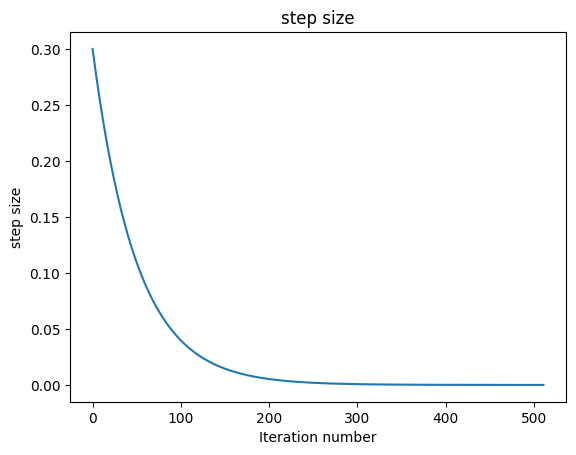

0/1000,x=10.000000,f(x)=5.000000,gradient=0.100000,gradient sign=+
50/1000,x=6.820848,f(x)=-16.684511,gradient=0.036417,gradient sign=+
100/1000,x=5.663098,f(x)=-19.560301,gradient=0.013262,gradient sign=+
150/1000,x=5.241480,f(x)=-19.941687,gradient=0.004830,gradient sign=+
200/1000,x=5.087940,f(x)=-19.992267,gradient=0.001759,gradient sign=+
250/1000,x=5.032025,f(x)=-19.998974,gradient=0.000640,gradient sign=+
300/1000,x=5.011663,f(x)=-19.999864,gradient=0.000233,gradient sign=+
350/1000,x=5.004247,f(x)=-19.999982,gradient=0.000085,gradient sign=+
400/1000,x=5.001547,f(x)=-19.999998,gradient=0.000031,gradient sign=+
450/1000,x=5.000563,f(x)=-20.000000,gradient=0.000011,gradient sign=+
Min Value of Cost Function is x=5.000498954013208.


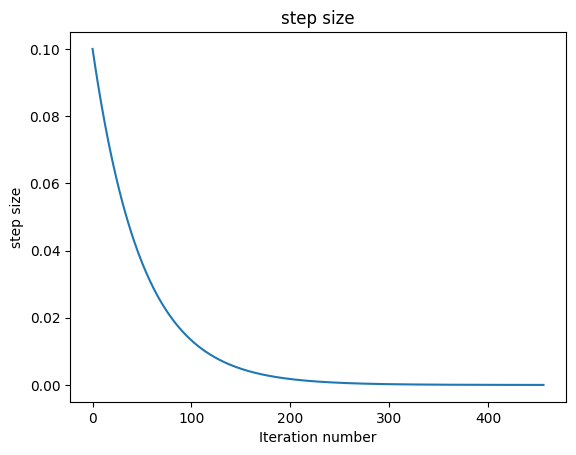

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return np.power(x-5,2)-20

def f_derivative(x):
  return 2*x-10

def gradient_descent(next_x,gamma,precision,max_iteration):
  list_step=[]
  for i in range(max_iteration):
    current_x=next_x
    next_x=current_x-gamma*f_derivative(current_x)
    step=next_x-current_x
    list_step.append(abs(step))

    if i%50==0:
      print('{}/{},x={:5.6f},'.format(i,max_iteration,current_x),end="")
      gradient=gamma*f_derivative(current_x)
      print('f(x)={:5.6f},gradient={:5.6f},'.format(f(current_x),gradient),end="")
      print('gradient sign={}'.format('+'if f_derivative(current_x)>0 else '-'))
    if abs(step)<=precision:
      break

  print('Min Value of Cost Function is x={}.'.format(current_x))
  Figure,ax=plt.subplots(1,1)
  ax.title.set_text('step size')
  ax.plot(list_step)
  ax.set_ylabel('step size')
  ax.set_xlabel('Iteration number')
  plt.show()

gradient_descent(next_x=-10, gamma=0.01, precision=0.00001, max_iteration=1000)
gradient_descent(next_x=10, gamma=0.01, precision=0.00001, max_iteration=1000)

0/1000 cost:0.029475224452192243
100/1000 cost:0.20306222170323696
200/1000 cost:0.2400715699122543
300/1000 cost:0.2116113550571419
400/1000 cost:0.029823348529556412
500/1000 cost:0.04983103939055908
600/1000 cost:0.06906908638220935
700/1000 cost:0.01110109437451025
800/1000 cost:0.02068130681137167
900/1000 cost:0.03301874820418473
1000/1000 cost:0.058951545488496064


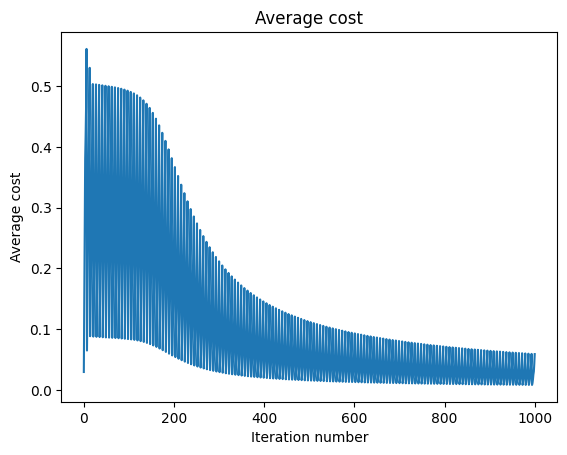

1
[0.94295549]
0
[0.02325971]
0
[0.03764678]
0
[0.05673913]
1
[0.9654101]
1
[0.91130789]
0
[0.11165982]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x))

def feed_forward(x,W1,W2,b1,b2):
  a1=x
  z2=np.dot(W1,a1)+b1
  a2=sigmoid(z2)
  z3=np.dot(W2,a2)+b2
  a3=sigmoid(z3)
  return a1, a2, a3, z2, z3

node_size = {'input_layer_size':3,
             'hidden_layer_size': 3,
             'output_layer_size':1
             }
learning_rate = 2.0
w2=np.random.random((node_size['output_layer_size'],node_size['hidden_layer_size']))
w1=np.random.random((node_size['hidden_layer_size'],node_size['input_layer_size']))
b2=np.random.random(node_size['output_layer_size'])
b1=np.random.random(node_size['hidden_layer_size'])
X=np.array([[1,0,0],[0,0,1],[0,1,1],[1,0,1],[1,1,0],[0,1,0],[1,1,1]])
Y=np.array([1,0,0,0,1,1,0])
count=0
max_iteration=1000
dataset_size=len(Y)
list_average_cost=[]

while count < max_iteration:
  dw2=np.zeros((node_size['output_layer_size'],node_size['hidden_layer_size']))
  dw1=np.zeros((node_size['hidden_layer_size'],node_size['input_layer_size']))
  db2=np.zeros(node_size['output_layer_size'])
  db1=np.zeros(node_size['hidden_layer_size'])
  average_cost=0
  for x,y in zip(X,Y):
    a1,a2,a3,z2,z3 = feed_forward(x,w1,w2,b1,b2)

    delta3=-(y-a3)*sigmoid_derivative(z3)
    average_cost+=np.linalg.norm((y-a3),2)/dataset_size

    delta2=np.dot(w2.T,delta3)*sigmoid_derivative(z2)
    dw2+=np.dot(delta3[:,np.newaxis],np.transpose(a2[:,np.newaxis]))/dataset_size
    db2+=delta3/dataset_size
    dw1+=np.dot(delta2[:,np.newaxis],np.transpose(a1[:,np.newaxis]))/dataset_size
    db1+=delta2/dataset_size

    w2+=-learning_rate*dw2
    b2+=-learning_rate*db2
    w1+=-learning_rate*dw1
    b1+=-learning_rate*db1

    list_average_cost.append(average_cost)
    if count%100 == 0:
      print('{}/{} cost:{}'.format(count,max_iteration,average_cost))
    count+=1

Figure,ax=plt.subplots(1,1)
ax.title.set_text('Average cost')
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

for x,y in zip(X,Y):
  a1,a2,a3,z2,z3 = feed_forward(x,w1,w2,b1,b2)
  print(y)
  print(a3)